# Homework 02:  Working with numbers

In [225]:
%matplotlib inline
import numpy as np
from sklearn import preprocessing
import re
import random
from scipy import stats
from matplotlib.ticker import NullFormatter, IndexLocator
import matplotlib.pyplot as plt
import math

**1**. (10 points) 

Normalize the $3 \times 4$ diagonal matrix with diagonal (1, ,2, 3) so all rows have mean 0 and standard deviation 1. The matrix has 0 everywhere not on the diagonal.

In [16]:
M = np.diag([1.0, 2.0, 3.0, 0.0])[:3, :]
M

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  2.,  0.,  0.],
       [ 0.,  0.,  3.,  0.]])

In [17]:
preprocessing.scale(M, axis=1)

array([[ 1.73205081, -0.57735027, -0.57735027, -0.57735027],
       [-0.57735027,  1.73205081, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027,  1.73205081, -0.57735027]])

**2**. (10 points) 

A fixed point of a funciton is a value that remains the same when the funciton is applied to it, that is $f(x) = x$. Write a function that finds the fixed poitn of another function $f$ given an intiial value $x_0$. For example, if

$$f(x) \rightarrow \sqrt{x}$$

and 

$x_0$ is any positive real number, then the function should return 1 since

$$\sqrt{1} = 1$$

Not all funcitons have a fixed point - if it taakes over 1,000 iterations, the fucntion shold return None.

- Use the function signature `fixed_point(f, x0, max_iter=1000)`. 
- Test with `fixed_point(np.sqrt, 10)`.

In [70]:
def fixed_point(f, x0, max_iter=1000):
    for i in range(max_iter):
        if f(x0) == x0:
            return x0
        elif i == max_iter-1:
            return None
        else: 
            x0 = f(x0)          

In [71]:
fixed_point(np.sqrt, 10)

1.0

**3**. (10 points) 

Use `np.fromfunction` to construc the following matrix

```python
array([[5, 0, 0, 0, 5],
       [0, 4, 0, 4, 0],
       [0, 0, 3, 0, 0],
       [0, 2, 0, 2, 0],
       [1, 0, 0, 0, 1]])
```

In [58]:
np.fromfunction(lambda i, j: np.where(i==j, 5-i, np.where(i+j==4, j+1, 0)), (5, 5), dtype='int64')

array([[5, 0, 0, 0, 5],
       [0, 4, 0, 4, 0],
       [0, 0, 3, 0, 0],
       [0, 2, 0, 2, 0],
       [1, 0, 0, 0, 1]])

**4**. (15 points)

Simulate $n$ coin toss experiments, in which you toss a coin $k$ times for each experiment. Find the maximum run length of heads (e.g. the sequence `T,T,H,H,H,T,H,H` has a maximum run length of 3 heads in each experiment.  What is the most common maximum run length?

Let $n$ = 10,000 and $k=100$.

In [198]:
# 1 in the matrix means head
random.seed(19)
n = 10000
k = 100
X = np.random.randint(0, 2, size = (n, k)).astype("str")
X = ["".join(i) for i in X]
l = [re.findall(r'[1]*', i) for i in X] 
j = []
for i in l:
    j.append(np.max([len(k) for k in i]))

In [199]:
np.max(j)

20

In [200]:
stats.mode(j)[0][0]

5

The maximum run length of heads is 6.
The most common maximum run length is 2.

**5**. (15 points)

Wikipedia gives this algorithm for finding prime numbers

To find all the prime numbers less than or equal to a given integer n by Eratosthenes' method:

- Create a list of consecutive integers from 2 through n: (2, 3, 4, ..., n).
- Initially, let p equal 2, the smallest prime number.
- Enumerate the multiples of p by counting to n from 2p in increments of p, and mark them in the list (these will be 2p, 3p, 4p, ...; the p itself should not be marked).
- Find the first number greater than p in the list that is not marked. If there was no such number, stop. Otherwise, let p now equal this new number (which is the next prime), and repeat from step 3.
- When the algorithm terminates, the numbers remaining not marked in the list are all the primes below n.

Find all primes less than 1,000 using this method.

- You may use `numpy` and do not have to follow the algorithm exactly if you can achieve the same results.

In [179]:
n = 1000
l = np.arange(2,n)
p = 2
prime = [p]
not_prime = np.arange(2*p, 1000, p)

for i in l:
    if i>p and i not in not_prime:
        p = i
        not_prime = np.hstack((not_prime, np.arange(2*p, 1000, p)))
        prime.append(p)  

In [183]:
print(prime)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


**6**. (40 points)

Write code to generate a plot similar to those shown below using the explanation for generation of 1D Cellular Automata found [here](http://mathworld.wolfram.com/ElementaryCellularAutomaton.html). You should only need to use standard Python, `numpy` and `matplotllib`.

![automata](http://mathworld.wolfram.com/images/eps-gif/ElementaryCA_850.gif)



The input to the function making the plots should be a simple list of rules

```python
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]
make_plots(rules, niter, ncols)
```

You may, of course, write other helper functions to keep your code modular.

In [237]:
def generate_ca(rule, niter):
    '''
    This function is used to get the specific matric according to the input of rule.
    '''
    b = [int(i) for i in re.sub("0b","", bin(rule)).zfill(8)]
    mymap = dict(zip(range(7, -1, -1), b))
    
    width = niter*2+1
    grid = np.zeros((niter, width), 'int64')
    
    first_row = np.zeros(width, 'int64')
    first_row[int((width-1)/2)]= 1
    grid[0] = first_row
    
    current_row = np.r_[first_row[-1:], first_row, first_row[0:1]]
    
    for i in range(1, niter):
        p = zip(current_row[0:], current_row[1:], current_row[2:])
        all_cell = [int(''.join(map(str, k)), base=2) for k in p]
        next_row = np.array([mymap[c] for c in all_cell])
        current_row = np.r_[next_row[-1:], next_row, next_row[0:1]]
        grid[i] = next_row
    
    return grid[:, 1:-1]

In [239]:
def plot_grid(rule, grid, ax=None):
    if ax is None:
        ax = plt.subplot(111)
    with plt.style.context('seaborn-white'):
        ax.grid(True, which='major', color='grey', linewidth=0.5)
        ax.imshow(grid, interpolation='none', cmap='Greys', aspect=1, alpha=0.8)
        ax.xaxis.set_major_locator(IndexLocator(1, 0))
        ax.yaxis.set_major_locator(IndexLocator(1, 0))
        ax.xaxis.set_major_formatter( NullFormatter() )
        ax.yaxis.set_major_formatter( NullFormatter() )
        ax.set_title('Rule %d' % rule)

In [258]:
def make_plot(rules, niters, ncol):
    l = len(rules)
    nrow = math.ceil(l/ncol)
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20,20))
    for i in range(nrow):
        for j in range(ncol):
           plot_grid(rules[ncol*i+j], generate_ca(rules[ncol*i+j], 15), ax = axes[i,j])

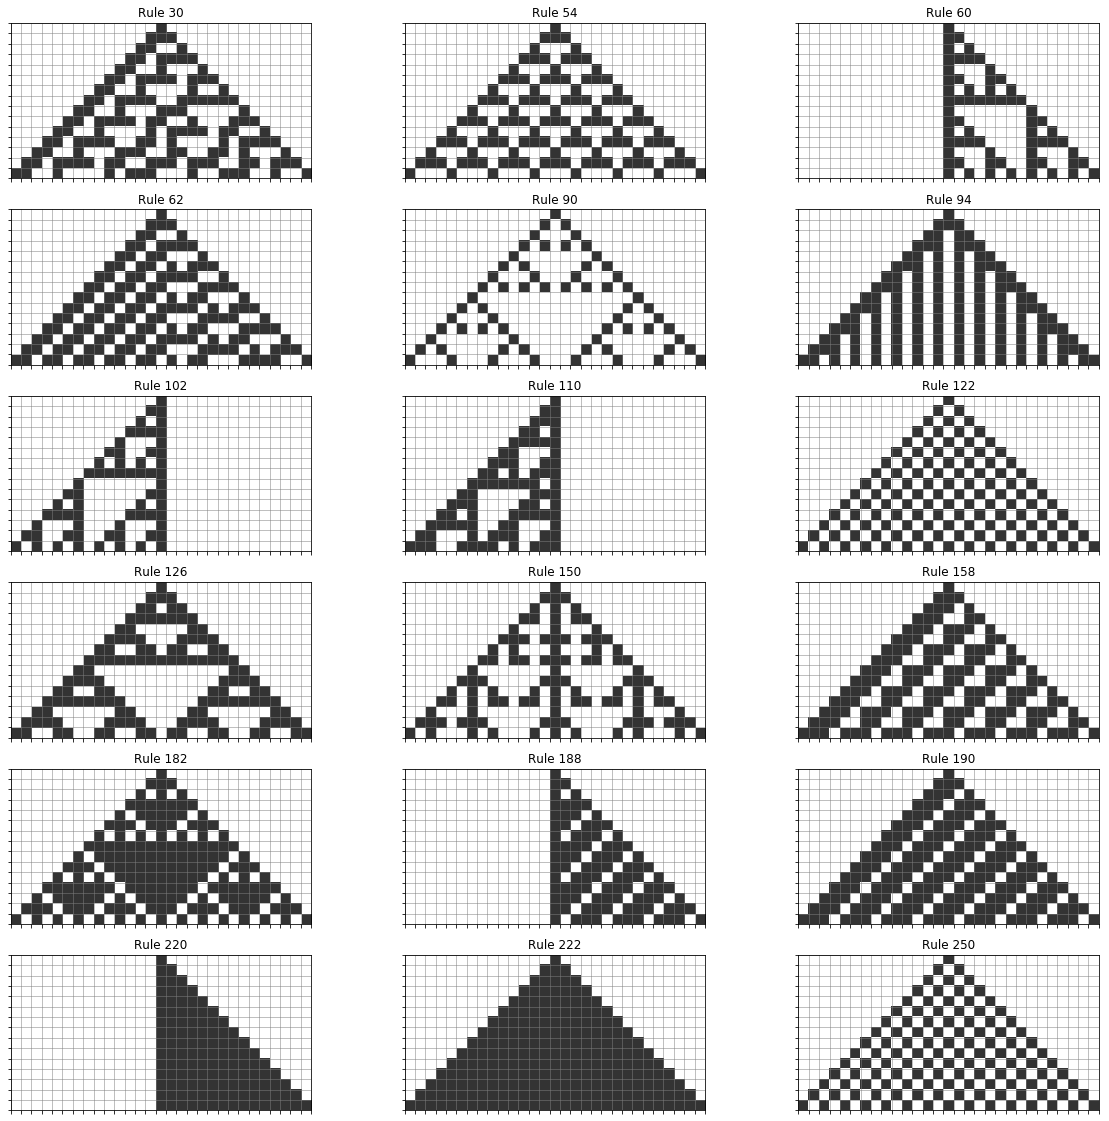

In [259]:
rules = rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]
make_plot(rules, 15, 3)